In [ ]:
# Citations: 
# https://pgmpy.org/
# https://networkx.org/documentation/stable/tutorial.html

!pip install pgmpy
from pgmpy.models import BayesianModel
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.factors.discrete import TabularCPD

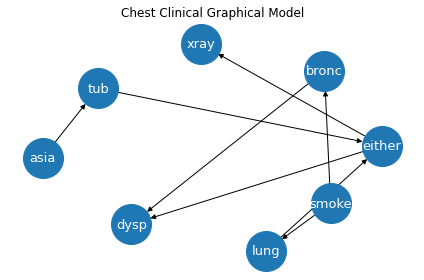

In [3]:
chest = BayesianModel ([('asia','tub'), 
                        ('tub','either'),
                        ('either','xray'),
                        ('either','dysp'),
                        ('lung','either'),
                        ('smoke','lung'),
                        ('smoke','bronc'),
                        ('bronc','dysp')])
plt.figure()
plt.title('Chest Clinical Graphical Model')
nx.draw(chest, with_labels=True, node_size=1600, font_size=13, font_color='white')

plt.axis('off')
axis = plt.gca()
axis.set_xlim([1*x for x in axis.get_xlim()])
axis.set_ylim([1*y for y in axis.get_ylim()])
plt.tight_layout()
plt.show()

In [4]:
asia = TabularCPD(variable='asia', variable_card=2,values=[[.01],[.99]])
tub = TabularCPD(variable='tub', variable_card=2,values=[[.05, .01],[.95, .99]], evidence=['asia'],evidence_card=[2])
smoke = TabularCPD(variable='smoke', variable_card=2,values=[[.5],[.5]])
lung = TabularCPD(variable='lung', variable_card=2,values=[[.1, .01],[.9, .99]], evidence=['smoke'],evidence_card=[2])
bronc = TabularCPD(variable='bronc', variable_card=2,values=[[.6, .3],[.4, .7]], evidence=['smoke'],evidence_card=[2])
either = TabularCPD(variable='either', variable_card=2,values=[[1,1,1,0],[0,0,0,1]], evidence=['tub', 'lung'],evidence_card=[2,2])
xray = TabularCPD(variable='xray', variable_card=2,values=[[.98, .05],[.02, .95]], evidence=['either'],evidence_card=[2])
dysp = TabularCPD(variable='dysp', variable_card=2,values=[[.9, .7, .8, .1],[.1, .3, .2, .9]], evidence=['bronc', 'either'],evidence_card=[2,2])
chest.add_cpds(asia, tub, smoke, lung, bronc, either, xray, dysp)


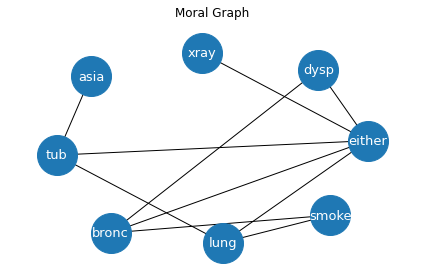

In [5]:
#Moral Graph
moral = chest.to_markov_model()
plt.figure()
plt.title('Moral Graph')
nx.draw(moral, with_labels=True, node_size=1600, font_size=13, font_color='white')

plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.tight_layout()
plt.show()

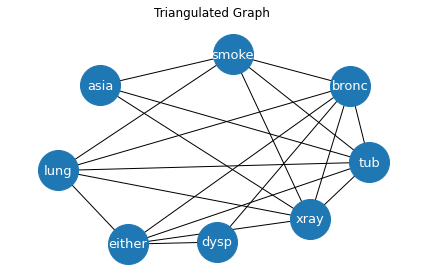

In [6]:
#Triangulated Graph 
tri = moral.triangulate()
plt.figure()
plt.title("Triangulated Graph")
nx.draw(tri, with_labels=True, node_size=1600, font_size=13, font_color='white')

plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.tight_layout()
plt.show()

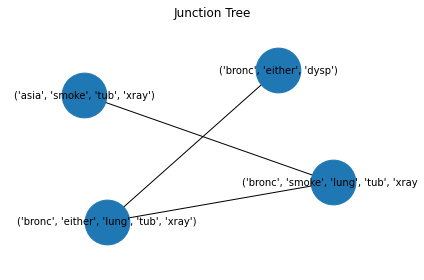

In [7]:
#Junction Tree
junction = tri.to_junction_tree()
plt.figure()
plt.title("Junction Tree")
nx.draw(junction, with_labels=True, node_size=2000, font_size=10)

plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.5*x for x in axis.get_xlim()])
axis.set_ylim([1.5*y for y in axis.get_ylim()])
plt.tight_layout()
plt.show()


**Running Intersection Property:**<br>
Citation: Building Probalistic Graphical Models with Python book from UBLearns<br>

"This property states that if a node appears in two cliques, it should
also appear in all the nodes on the path that connect the two cliques."

In our junction tree we can see that this property is satisfied. Take a look at the following example: <br>
* {'either', 'smoke', 'xray', 'asia'}
* {'either', 'smoke', 'tub', 'asia'}
* {'either', 'smoke', 'tub', 'lung'} <br> 
{'either', 'smoke'} is present in both the first and last cliques. Since {'either', 'smoke'} is also present in the middle cluster means that the property is satisfied. This can be said for all the cliques in this graph.


Task 2: <br>

**Question: Describe how the different terms on the right hand side of
p(V ) = p(a)p(t|a)p(s)p(l|s)p(b|s)p(e|t, l)p(d|e, b)p(x|e) are distributed among the different junction tree clusters.**<br>
> The different terms are distributed among the different junction tree cluster via the "Variable Elimination Method" 

**Question: Write out the messages using these terms and verify that the message passing algorithm indeed gives the cluster marginals.**

In [10]:
# Task 2 Part C
# Use message-passing algorithm to find the joint probability of “tub=yes, lung=yes, bronc=yes”, given evidence that “asia=yes, xray=yes”
from pgmpy.inference import VariableElimination

var = VariableElimination(chest)
q = var.query(variables=['tub', 'lung', 'bronc'], evidence={'asia':0, 'xray':0})
print(str(q))

Eliminating: smoke: 100%|██████████| 3/3 [00:00<00:00, 197.13it/s]

+----------+---------+--------+-----------------------+
| bronc    | lung    | tub    |   phi(bronc,lung,tub) |
+==========+=========+========+=======================+
| bronc(0) | lung(0) | tub(0) |                0.0106 |
+----------+---------+--------+-----------------------+
| bronc(0) | lung(0) | tub(1) |                0.2021 |
+----------+---------+--------+-----------------------+
| bronc(0) | lung(1) | tub(0) |                0.1413 |
+----------+---------+--------+-----------------------+
| bronc(0) | lung(1) | tub(1) |                0.1370 |
+----------+---------+--------+-----------------------+
| bronc(1) | lung(0) | tub(0) |                0.0079 |
+----------+---------+--------+-----------------------+
| bronc(1) | lung(0) | tub(1) |                0.1508 |
+----------+---------+--------+-----------------------+
| bronc(1) | lung(1) | tub(0) |                0.1778 |
+----------+---------+--------+-----------------------+
| bronc(1) | lung(1) | tub(1) |                0

The joint probability of “tub=yes, lung=yes, bronc=yes”, given evidence that “asia=yes, xray=yes” is **0.0106**